In [2]:
# Brent Oil Price EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [3]:
# Load data
df = pd.read_csv('../data/brent_oil_prices.csv')
df['Date'] = pd.to_datetime(df['Date'],  format="%m/%d/%Y")
df = df.sort_values('Date').reset_index(drop=True)

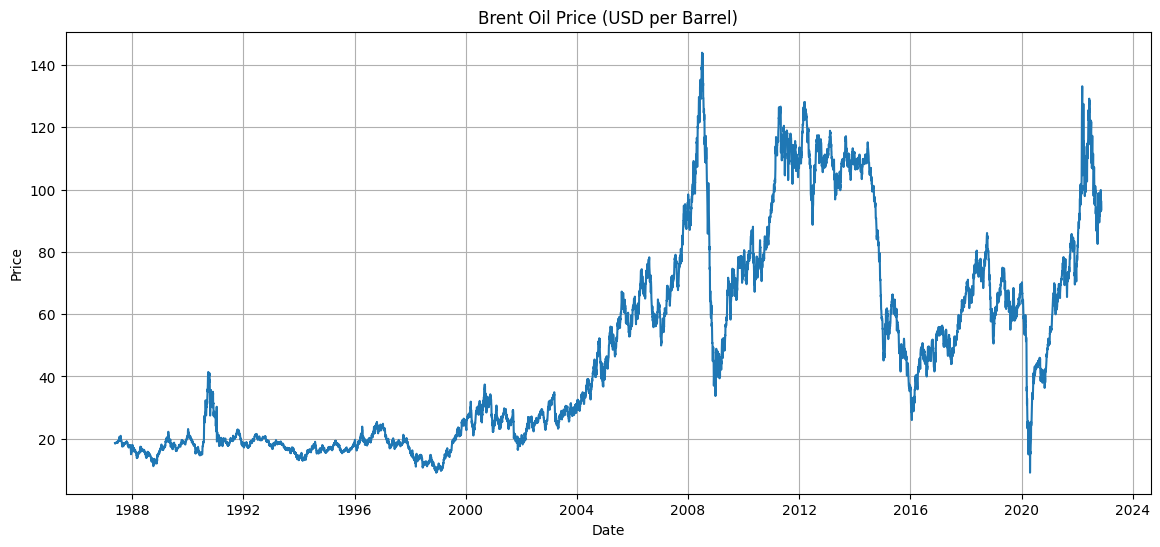

In [4]:
# Plot raw prices
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'])
plt.title('Brent Oil Price (USD per Barrel)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [5]:
# Log returns
df['Log_Returns'] = np.log(df['Price']) - np.log(df['Price'].shift(1))

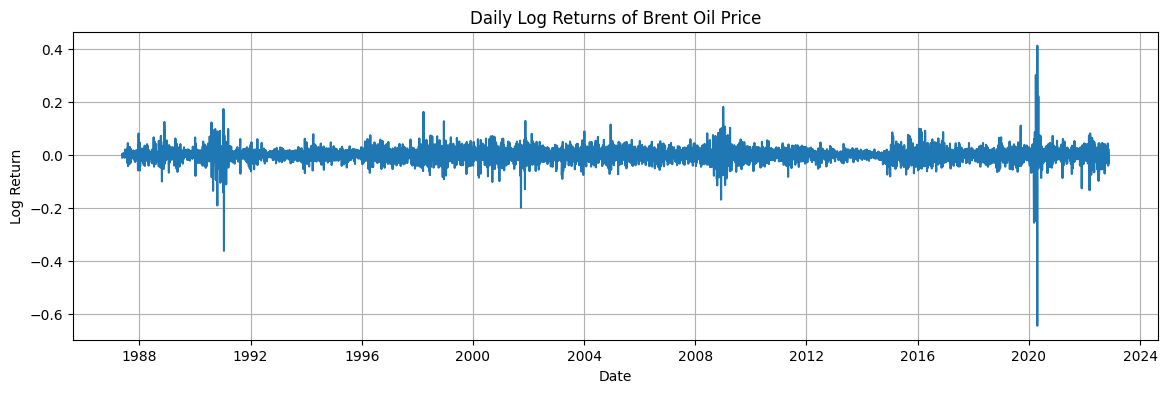

In [6]:
# Plot log returns
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Log_Returns'])
plt.title('Daily Log Returns of Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.show()

##### **📈 Rolling Mean & Std for Stationarity Check**

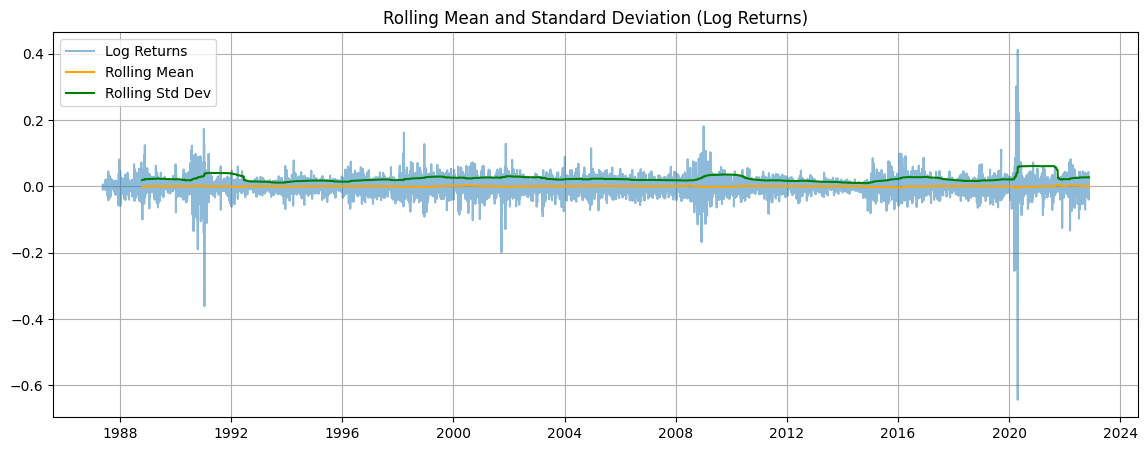

In [8]:
# Rolling mean and std
window = 365  # 1 year window
rolling_mean = df['Log_Returns'].rolling(window=window).mean()
rolling_std = df['Log_Returns'].rolling(window=window).std()

plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Log_Returns'], label='Log Returns', alpha=0.5)
plt.plot(df['Date'], rolling_mean, label='Rolling Mean', color='orange')
plt.plot(df['Date'], rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean and Standard Deviation (Log Returns)')
plt.legend()
plt.grid(True)
plt.show()

##### **📊 Histogram + KDE Plot for Log Returns**

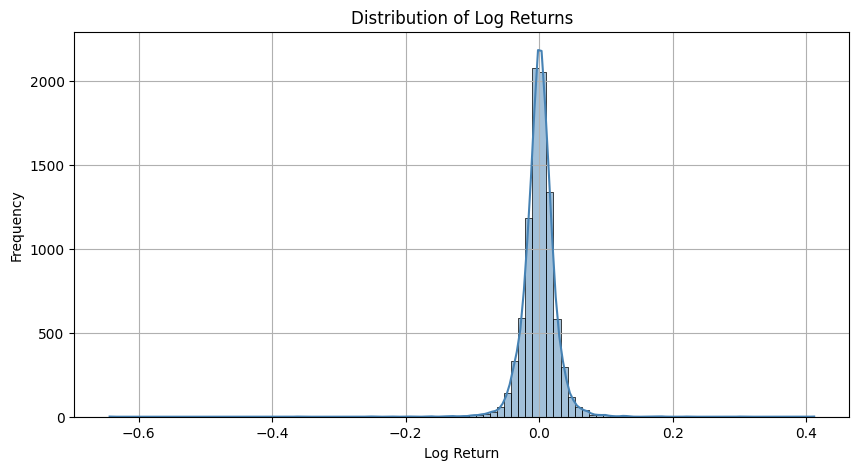

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Log_Returns'].dropna(), kde=True, bins=100, color='steelblue')
plt.title('Distribution of Log Returns')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### **🧪 Extended ADF Test Results with Interpretation**

In [10]:
def adf_report(series):
    result = adfuller(series.dropna())
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")
    if result[1] <= 0.05:
        print("\n✅ The series is likely stationary.")
    else:
        print("\n⚠️ The series is likely non-stationary.")

adf_report(df['Log_Returns'])

ADF Statistic: -16.427113494485894
p-value: 2.4985801611428892e-29
Critical Value (1%): -3.4310783342658615
Critical Value (5%): -2.861861876398633
Critical Value (10%): -2.566941329781918

✅ The series is likely stationary.


##### **🗓️ Overlay Key Events on Price Plot**

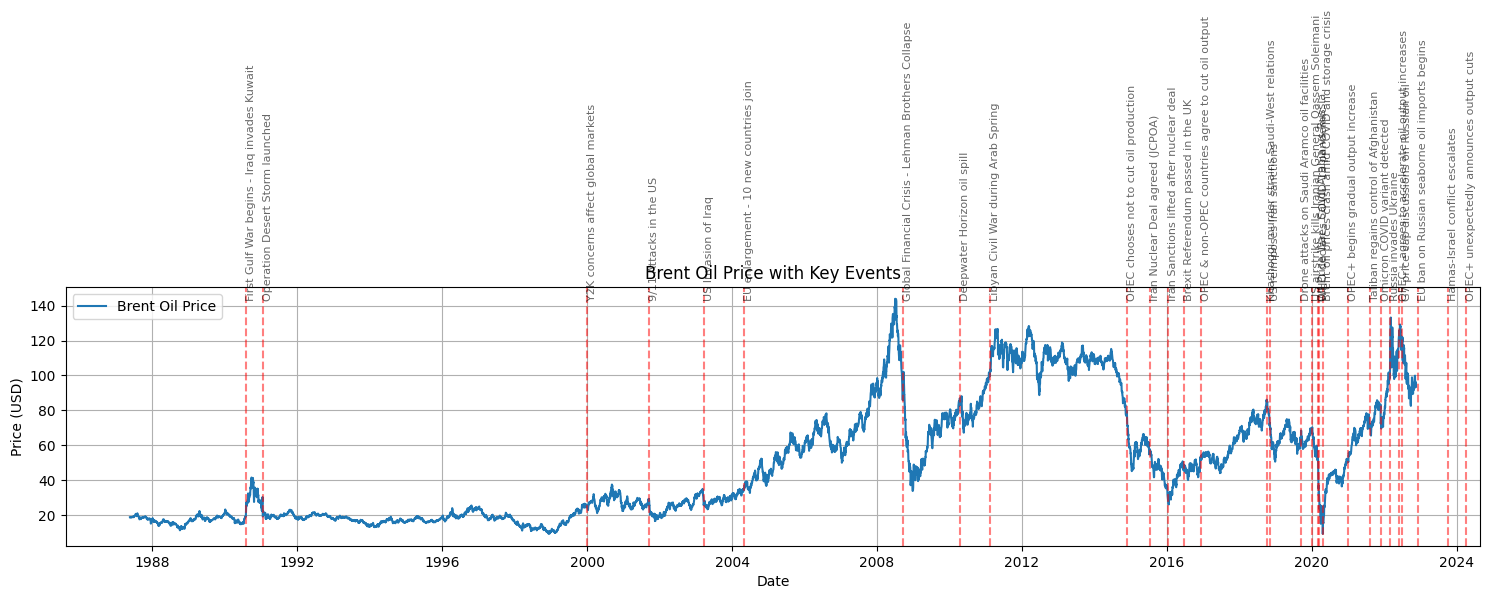

In [11]:
events_df = pd.read_csv('../data/key_events.csv')
events_df['Date'] = pd.to_datetime(events_df['Date'])

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.5)
    plt.text(row['Date'], max(df['Price']), row['Event'], rotation=90, fontsize=8, alpha=0.6)
plt.title('Brent Oil Price with Key Events')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

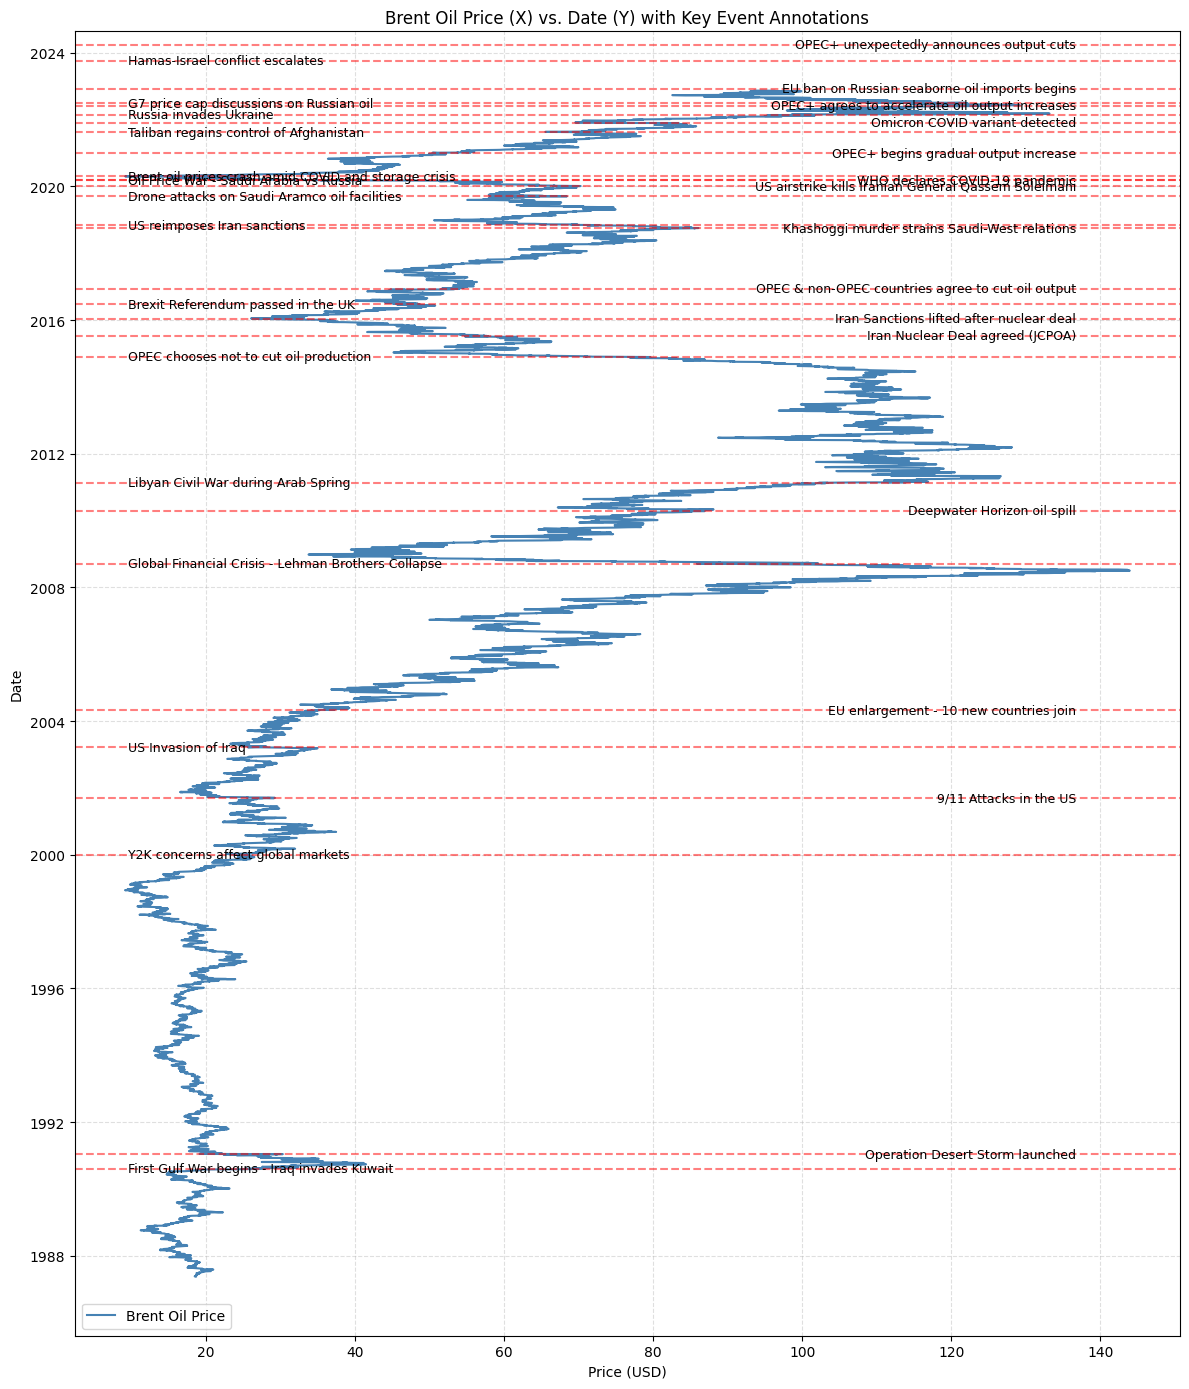

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

events_df = pd.read_csv('../data/key_events.csv')
events_df['Date'] = pd.to_datetime(events_df['Date'])

plt.figure(figsize=(12, 14))
plt.plot(df['Price'], df['Date'], label='Brent Oil Price', color='steelblue')

# Plot horizontal lines and alternate text labels left/right for readability
for i, row in events_df.iterrows():
    plt.axhline(y=row['Date'], color='red', linestyle='--', alpha=0.5)

    # Alternate left/right annotations
    if i % 2 == 0:
        ha = 'left'
        x_pos = min(df['Price']) * 1.05
    else:
        ha = 'right'
        x_pos = max(df['Price']) * 0.95

    plt.text(x=x_pos,
             y=row['Date'],
             s=row['Event'],
             verticalalignment='center',
             horizontalalignment=ha,
             fontsize=9,
             color='black',
            )

# Formatting
plt.title('Brent Oil Price (X) vs. Date (Y) with Key Event Annotations')
plt.ylabel('Date')
plt.xlabel('Price (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### **🧼 Summary Statistics**

In [12]:
print("Price Summary Statistics:")
print(df['Price'].describe())
print("\nLog Return Summary Statistics:")
print(df['Log_Returns'].describe())

Price Summary Statistics:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64

Log Return Summary Statistics:
count    9010.000000
mean        0.000179
std         0.025532
min        -0.643699
25%        -0.011154
50%         0.000402
75%         0.012127
max         0.412023
Name: Log_Returns, dtype: float64


##### **Cleaned Dataset Saved**

In [14]:
output_path = '../data/processed/brent_log_returns.csv'
df.to_csv(output_path, index=False)
print(f"✅ Processed file saved successfully at: {output_path}")

✅ Processed file saved successfully at: ../data/processed/brent_log_returns.csv
